In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random

In [268]:
!ls

sample_data


In [0]:
np.random.seed(0)

In [270]:
!ls

sample_data


In [271]:
with open('/train.p',mode='rb') as f:
    train_data = pickle.load(f)
with open('/valid.p',mode='rb') as f:
    valid_data = pickle.load(f)
with open('/test.p',mode='rb') as f:
    test_data = pickle.load(f)

print(type(train_data))

X_train,y_train = train_data['features'], train_data['labels']
X_valid,y_valid = valid_data['features'], valid_data['labels']
X_test,y_test = test_data['features'], test_data['labels']


<class 'dict'>


In [272]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_valid.shape[0] == y_valid.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] ==(32,32,3)), "The dimensions of the images are not 32 * 32 * 3"
assert(X_valid.shape[1:] ==(32,32,3)), "The dimensions of the images are not 32 * 32 * 3"
assert(X_test.shape[1:] ==(32,32,3)), "The dimensions of the images are not 32 * 32 * 3"

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/signnames.csv')

In [276]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


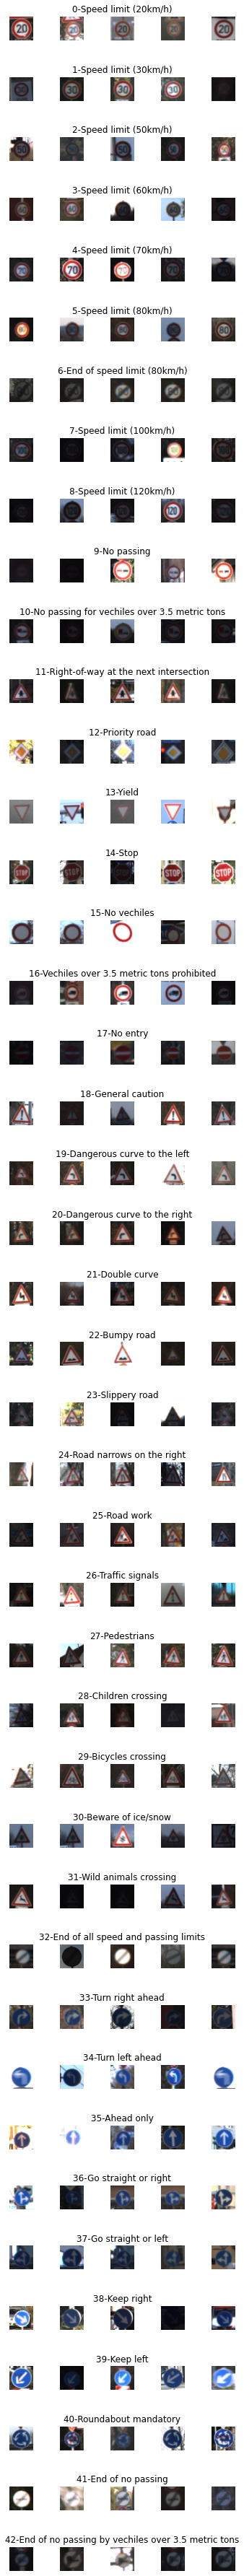

In [277]:
num_of_samples = []
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


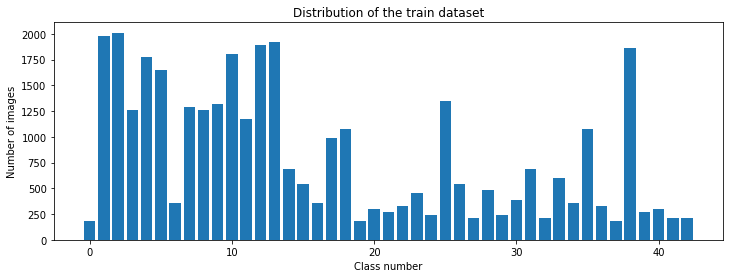

In [278]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


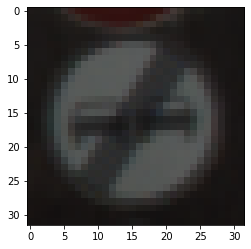

In [279]:
import cv2

plt.imshow(X_train[29])
print(X_train[29].shape)
print(y_train[1000])

# RGB 3벡터를 1개로 변환

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [0]:
img = grayscale(X_train[1000])

(32, 32)


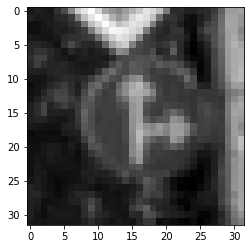

In [282]:
plt.imshow(img,cmap='gray')
print(img.shape)

# histogram equalizer

In [0]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)


(32, 32)


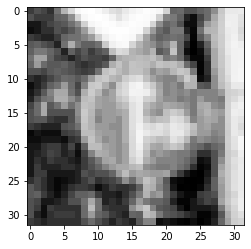

In [284]:
plt.imshow(img,cmap='gray')
print(img.shape)

In [0]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255 #normalizaion
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_valid = np.array(list(map(preprocessing, X_valid)))
X_test = np.array(list(map(preprocessing, X_test)))


In [286]:
X_train 

array([[[0.26666667, 0.1254902 , 0.1254902 , ..., 0.45490196,
         0.45490196, 0.45490196],
        [0.38431373, 0.26666667, 0.26666667, ..., 0.45490196,
         0.45490196, 0.45490196],
        [0.38431373, 0.26666667, 0.26666667, ..., 0.45490196,
         0.45490196, 0.45490196],
        ...,
        [0.1254902 , 0.26666667, 0.26666667, ..., 0.1254902 ,
         0.1254902 , 0.26666667],
        [0.1254902 , 0.26666667, 0.26666667, ..., 0.1254902 ,
         0.1254902 , 0.1254902 ],
        [0.1254902 , 0.26666667, 0.26666667, ..., 0.1254902 ,
         0.03529412, 0.        ]],

       [[0.15686275, 0.05098039, 0.15686275, ..., 0.53333333,
         0.53333333, 0.53333333],
        [0.15686275, 0.15686275, 0.29019608, ..., 0.49411765,
         0.49411765, 0.56078431],
        [0.15686275, 0.15686275, 0.15686275, ..., 0.40784314,
         0.49411765, 0.56078431],
        ...,
        [0.29019608, 0.40784314, 0.40784314, ..., 0.15686275,
         0.15686275, 0.15686275],
        [0.1

(34799, 32, 32)


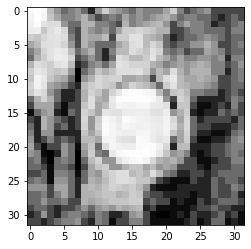

In [287]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)],cmap='gray')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

In [0]:
X_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[1], X_valid.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

상하 좌우 이동의 비율을 0.1 줌을 0.2 회전은 10도

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagenerate = ImageDataGenerator(width_shift_range=0.1,
                  height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range=0.1,
                   rotation_range=10)

datagenerate.fit(X_train)

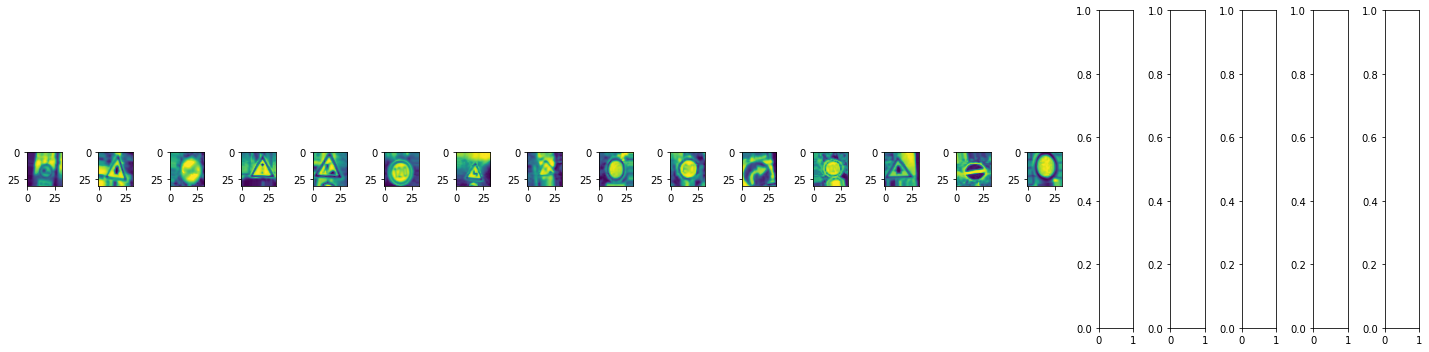

In [291]:
batches = datagenerate.flow(X_train,y_train,batch_size=20)
X_batch, y_batch = next(batches)

fig,axes = plt.subplots(1, 20, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axes[i].imshow(X_batch[i].reshape(32,32))


dropout이 너무 많으면 underfitting문제가 발생한다.

In [0]:
y_train = to_categorical(y_train,43)
y_valid = to_categorical(y_valid,43)
y_test = to_categorical(y_test,43)

In [0]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60,(5, 5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(60,(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(30,(3, 3), activation='relu'))
    model.add(Conv2D(30,(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    
    #Compile model
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics = ['accuracy'])
    return model

In [0]:
model = leNet_model()

In [295]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 480)              

In [296]:
model.fit_generator(datagenerate.flow(X_train,y_train,batch_size=64), shuffle=1,steps_per_epoch=2000,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.7312 - accuracy: 0.7841 - val_loss: 0.0741 - val_accuracy: 0.9789
Epoch 2/10
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1689 - accuracy: 0.9474 - val_loss: 0.0680 - val_accuracy: 0.9791
Epoch 3/10
2000/2000 [==============================] - 42s 21ms/step - loss: 0.1096 - accuracy: 0.9657 - val_loss: 0.0620 - val_accuracy: 0.9850
Epoch 4/10
2000/2000 [==============================] - 41s 21ms/step - loss: 0.0861 - accuracy: 0.9731 - val_loss: 0.0607 - val_accuracy: 0.9853
Epoch 5/10
2000/2000 [==============================] - 41s 20ms/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.0341 - val_accuracy: 0.9912
Epoch 6/10
2000/2000 [==============================] - 41s 20ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0221 - val_accuracy: 0.9925
Epoch 7/10
2000/2000 [==============================] - 41s 20ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0840 -

In [0]:
df=pd.DataFrame(model.history.history)

In [298]:
df

,val_loss,val_accuracy,loss,accuracy
0,0.074080,0.978912,0.731334,0.784057
1,0.068003,0.979138,0.168937,0.947410
2,0.061992,0.985034,0.109623,0.965705
3,0.060705,0.985261,0.086066,0.973067
4,0.034077,0.991156,0.072062,0.977371
5,0.022131,0.992517,0.062249,0.981138
6,0.083985,0.985261,0.055706,0.982647
7,0.031067,0.993651,0.051099,0.984953
8,0.030160,0.992517,0.046578,0.985033
9,0.041732,0.989342,0.046221,0.986354


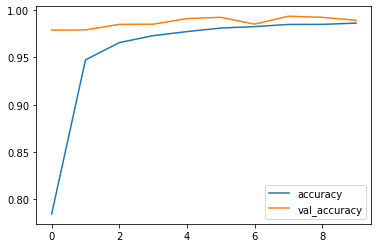

In [299]:
df[['accuracy','val_accuracy']].plot()


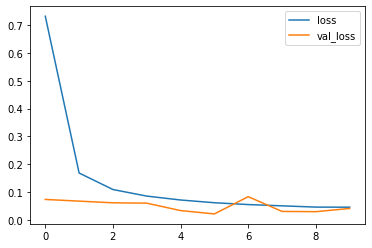

In [300]:
df[['loss','val_loss']].plot()



In [301]:
score = model.evaluate(X_test,y_test)

12630/12630 [==============================] - 1s 89us/step


In [302]:
print("loss",score[0])
print("acc",score[1])

loss 0.10925533666650888
acc 0.9727632403373718


Test URL

https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg



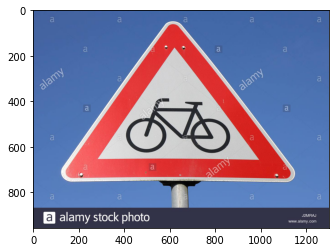

In [309]:
 import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 

(32, 32)


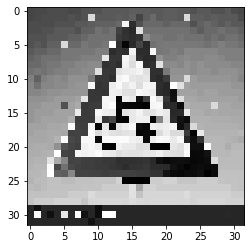

In [310]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 

In [311]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))


predicted sign: [19]


## 이미지가 뒤집어지거나 줌되거나 달라지면 예측을 잘 못함


